In [ ]:
!pip install bertopic
!pip install sentence_transformers
!pip install safetensors
!pip install datasets
!pip install datashader
!pip install adjustText

In [ ]:
# import pandas lib as pd
import pandas as pd

# read by default 1st sheet of an excel file
df = pd.read_excel('Indicators.xlsx')

In [ ]:
import re
indicadores = []
for row in df[["Indicators", "Area", "Unnamed: 3", "Unnamed: 4"]].iterrows():
  strings = [re.sub('[^A-Za-z\s]+', '', value) for value in row[1] if type(value) == str]
  text = " ".join(strings)
  indicadores.append(text)

In [ ]:
from sentence_transformers import SentenceTransformer

# Create embeddings
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(indicadores, show_progress_bar=True)

Batches:   0%|          | 0/201 [00:00<?, ?it/s]

In [ ]:
import collections
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer

# Extract vocab to be used in BERTopic
vocab = collections.Counter()
tokenizer = CountVectorizer().build_tokenizer()
for doc in tqdm(indicadores):
  vocab.update(tokenizer(doc))
vocab = [word for word, frequency in vocab.items() if frequency >= 15]; len(vocab)

100%|██████████| 6418/6418 [00:00<00:00, 75179.00it/s]


1542

In [ ]:
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic

# Prepare sub-models
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
umap_model = UMAP(n_components=5, n_neighbors=50, random_state=42, metric="cosine", verbose=True)
hdbscan_model = HDBSCAN(min_samples=50, gen_min_span_tree=True, prediction_data=False, min_cluster_size=50)
vectorizer_model = CountVectorizer(vocabulary=vocab, stop_words="english")

# Fit BERTopic without actually performing any clustering
topic_model= BERTopic(
        embedding_model=embedding_model,
        umap_model=umap_model,
        hdbscan_model=hdbscan_model,
        vectorizer_model=vectorizer_model,
        verbose=True
).fit(indicadores, embeddings=embeddings)

2024-02-07 13:36:27,160 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


UMAP(angular_rp_forest=True, metric='cosine', n_components=5, n_neighbors=50, random_state=42, verbose=True)
Wed Feb  7 13:36:27 2024 Construct fuzzy simplicial set
Wed Feb  7 13:36:27 2024 Finding Nearest Neighbors
Wed Feb  7 13:36:27 2024 Building RP forest with 9 trees
Wed Feb  7 13:36:27 2024 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	Stopping threshold met -- exiting after 3 iterations
Wed Feb  7 13:36:30 2024 Finished Nearest Neighbor Search
Wed Feb  7 13:36:30 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


2024-02-07 13:36:55,735 - BERTopic - Dimensionality - Completed ✓
2024-02-07 13:36:55,738 - BERTopic - Cluster - Start clustering the reduced embeddings


Wed Feb  7 13:36:55 2024 Finished embedding


2024-02-07 13:36:55,983 - BERTopic - Cluster - Completed ✓
2024-02-07 13:36:55,992 - BERTopic - Representation - Extracting topics from clusters using representation models.
/usr/local/lib/python3.10/dist-packages/bertopic/vectorizers/_ctfidf.py:82: RuntimeWarning: divide by zero encountered in divide
  idf = np.log((avg_nr_samples / df)+1)
2024-02-07 13:36:56,263 - BERTopic - Representation - Completed ✓


In [ ]:
topic_model.get_topic_info().to_excel("results_50.xlsx", index=False)

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2908,-1_social_health_number_services,"[social, health, number, services, management,...",[Goal End hunger achieve food security and im...
1,0,659,0_water_energy_food_waste,"[water, energy, food, waste, percentage, produ...",[Consumer Goods ECommerce Hardware Infrastruc...
2,1,350,1_sustainable_inclusive_countries_promote,"[sustainable, inclusive, countries, promote, p...",[Goal Promote peaceful and inclusive societie...
3,2,275,2_period_reporting_individuals_organizations,"[period, reporting, individuals, organizations...",[Client Individuals Forcibly Displaced Number ...
4,3,245,3_performance_values_improvement_people,"[performance, values, improvement, people, lea...",[Living the organisations values and behaviour...
5,4,230,4_volunteers_staff_capital_young,"[volunteers, staff, capital, young, people, vo...",[Online Survey for Staff Social Capital Recru...
6,5,177,5_gas_management_emissions_percentage,"[gas, management, emissions, percentage, opera...",[Extractives Minerals Processing Oil Gas Se...
7,6,158,6_thesis_impact_investment_procedures,"[thesis, impact, investment, procedures, inves...",[Dimension Commitment of governance and manag...
8,7,156,7_community_local_capital_communities,"[community, local, capital, communities, creat...",[Engagement with local community of consulta...
9,8,142,8_transportation_rate_safety_road,"[transportation, rate, safety, road, recordabl...","[TRANSPORTATION TR Decreased journey times, T..."


Read this: https://stackoverflow.com/questions/67898039/hdbscan-difference-between-parameters


In [ ]:
reduced_embeddings_2d = umap_model.transform(embeddings)

In [ ]:
import itertools
import pandas as pd

# Define colors for the visualization to iterate over
colors = itertools.cycle(['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000'])
color_key = {str(topic): next(colors) for topic in set(topic_model.topics_) if topic != -1}

# Prepare dataframe and ignore outliers
df = pd.DataFrame({"x": reduced_embeddings_2d[:, 0], "y": reduced_embeddings_2d[:, 1], "Topic": [str(t) for t in topic_model.topics_]})
df["Length"] = [len(doc) for doc in indicadores]
df = df.loc[df.Topic != "-1"]
df = df.loc[(df.y > -10) & (df.y < 10) & (df.x < 10) & (df.x > -10), :]
df["Topic"] = df["Topic"].astype("category")

# Get centroids of clusters
mean_df = df.groupby("Topic").mean().reset_index()
mean_df.Topic = mean_df.Topic.astype(int)
mean_df = mean_df.sort_values("Topic")

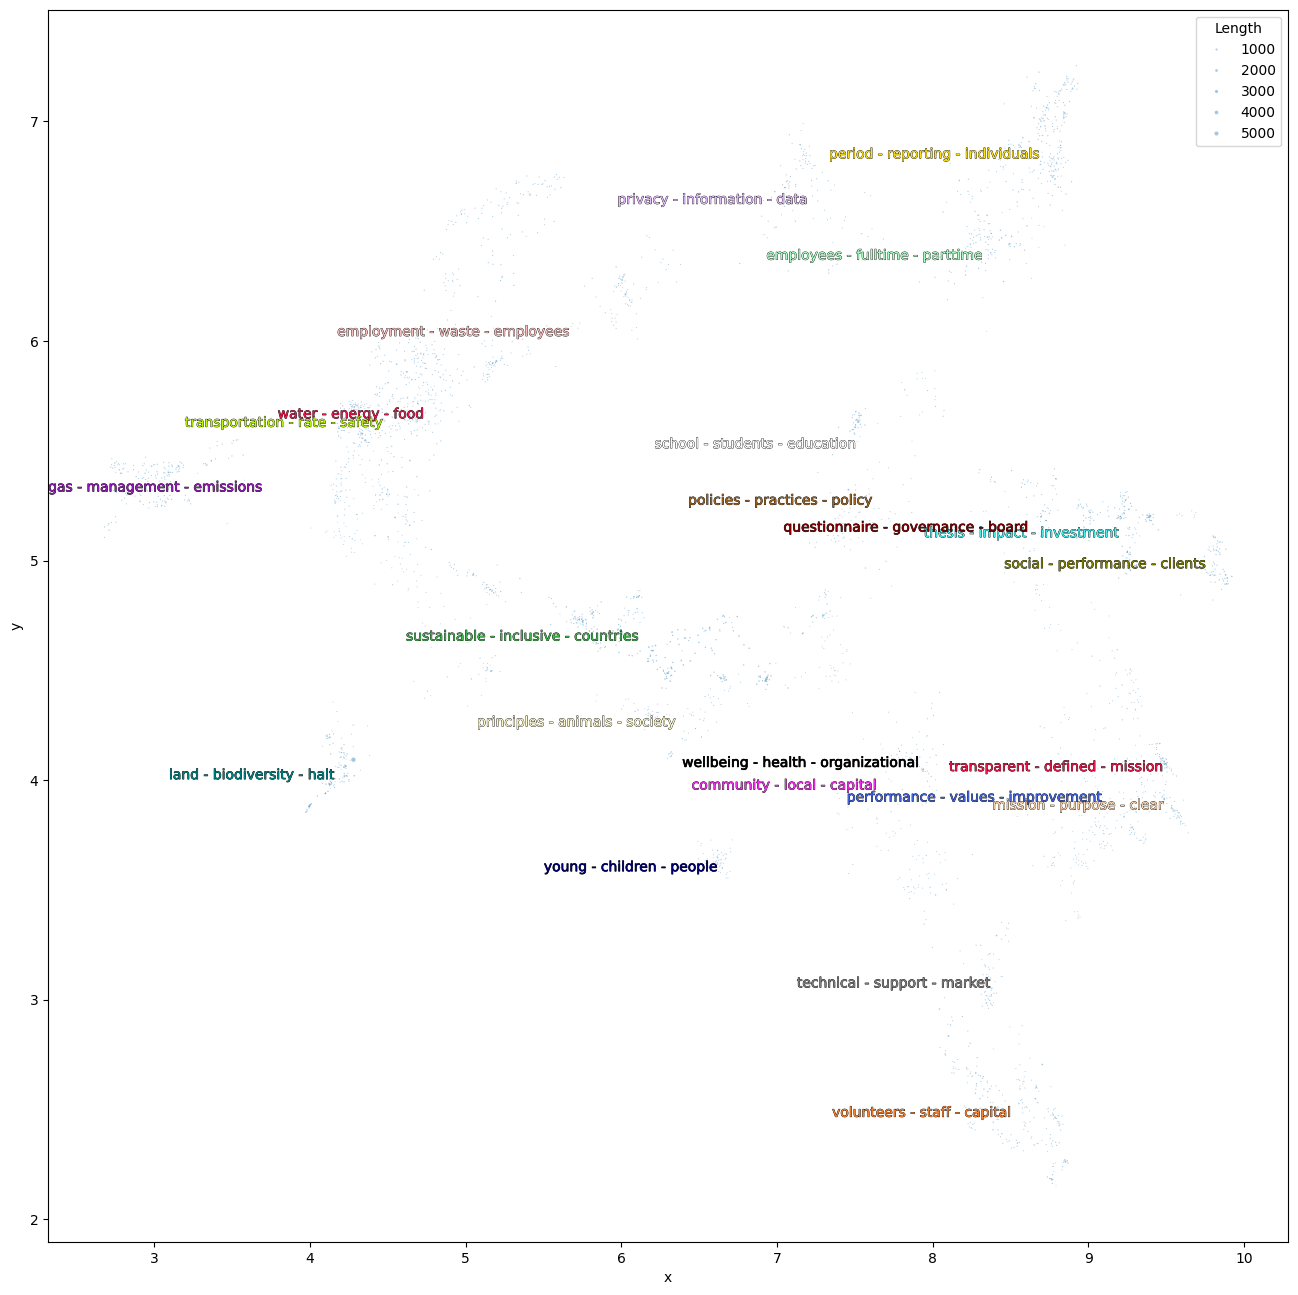

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from adjustText import adjust_text
import matplotlib.patheffects as pe

fig = plt.figure(figsize=(16, 16))
sns.scatterplot(data=df, x='x', y='y', alpha=0.4, sizes=(0.4, 10), size="Length")

# Annotate top 50 topics
texts, xs, ys = [], [], []
for row in mean_df.iterrows():
  topic = row[1]["Topic"]
  name = " - ".join(list(zip(*topic_model.get_topic(int(topic))))[0][:3])

  if int(topic) <= 50:
    xs.append(row[1]["x"])
    ys.append(row[1]["y"])
    texts.append(plt.text(row[1]["x"], row[1]["y"], name, size=10, ha="center", color=color_key[str(int(topic))],
                          path_effects=[pe.withStroke(linewidth=0.5, foreground="black")]))

# Adjust annotations such that they do not overlap
adjust_text(texts, x=xs, y=ys, time_lim=1, force_text=(0.01, 0.02), force_static=(0.01, 0.02), force_pull=(0.5, 0.5))
plt.show()
# plt.savefig("visualization2.png", dpi=600)